In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [44]:
#sns.set_style("white")
plt.rcParams['font.size'] = '12'

In [3]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     / 133.1 MB 1.2 MB/s
     |████████████████████████████████| 6.6 MB 4.9 MB/s 
     |████████████████████████████████| 219 kB 46.8 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759600 sha256=9b0d703979736aa05eba76214c51ab385af3a8462814055d7aaf359cc2038b5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2biv3vk/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

In [4]:
from mpl_toolkits.basemap import Basemap

In [5]:
home_dir = '/content/drive/MyDrive/Colab Notebooks/transient_detection/'

In [6]:
index_included = np.array([True for i in range(212)])
index_included[[157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172]] = False
#16,
index_included

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
column_names = ['staname','stalat','stalon', 'velo_n', 'velo_e', 'velo_u']
df = pd.read_table(home_dir+'remodeled_results/rsi_velocities.txt',sep='\s+', float_precision='round_trip', names=column_names)
#df.head()

staname = df['staname'].values[index_included]
stalat = df['stalat'].values[index_included]
stalon = df['stalon'].values[index_included]

rsi_velo_n = df['velo_n'].values[index_included]
rsi_velo_e = df['velo_e'].values[index_included]

In [55]:
df = pd.read_table(home_dir+'remodeled_results/ml_velocities.txt',sep='\s+', float_precision='round_trip', names=column_names)
ml_velo_n = df['velo_n'].values[index_included]
ml_velo_e = df['velo_e'].values[index_included]

In [53]:
lat_vec = np.arange(40,51,2)
lon_vec = np.arange(-128,-118,2)

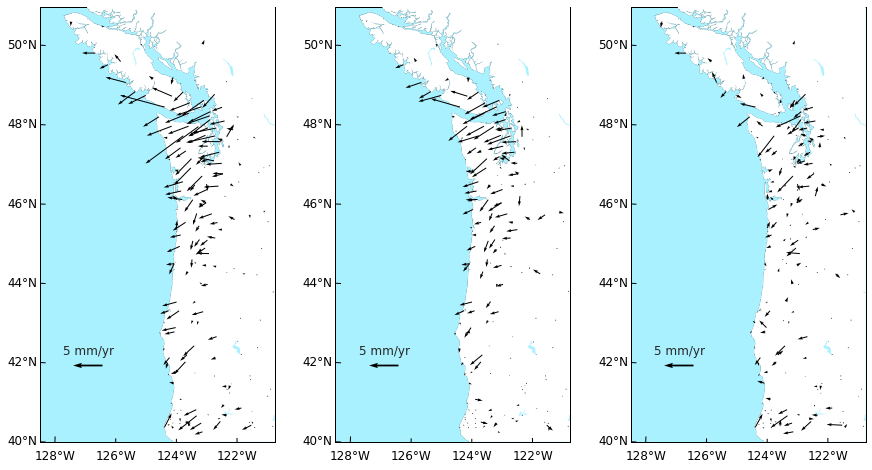

In [73]:
def plot_velo(ux, uy):
  map = Basemap(llcrnrlon=-128.5,llcrnrlat=40,urcrnrlon=-120,urcrnrlat=51,
            resolution='i',projection='tmerc',lon_0=-124.25,lat_0=45.5)
  map.drawmapboundary(fill_color=[0.6667, 0.9451, 1.000], zorder=0)
  map.drawcoastlines(linewidth=0.2, zorder=1)
  map.fillcontinents(color='white', zorder=2)
  map.quiver(stalon, stalat, ux, uy, latlon=True, scale=40, zorder=3)
  map.quiver(-126.5,42, -5, 0, latlon=True, scale=40, zorder=3)
  plt.annotate('5 mm/yr', (0.1,0.2), xycoords='axes fraction')
  map.drawparallels(lat_vec,labels=[1,0,0,0], linewidth=1, dashes=[6,900], color='k')
  map.drawmeridians(lon_vec,labels=[0,0,0,1], linewidth=1, dashes=[6,900], color='k')

fig = plt.figure(figsize=(15,8))
fig.add_subplot(1,3,1)
plot_velo(-ml_velo_e, -ml_velo_n)

fig.add_subplot(1,3,2)
plot_velo(-rsi_velo_e, -rsi_velo_n)

fig.add_subplot(1,3,3)
plot_velo(-ml_velo_e+rsi_velo_e, -ml_velo_n+rsi_velo_n)

plt.savefig(home_dir+'remodeled_velocities.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

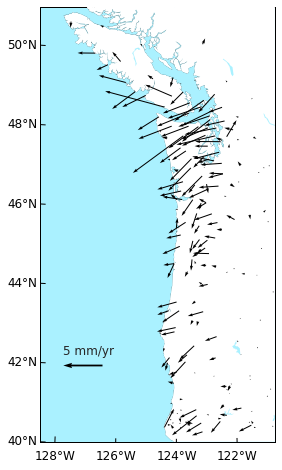

In [64]:
plt.figure(figsize=(5,8))
map = Basemap(llcrnrlon=-128.5,llcrnrlat=40,urcrnrlon=-120,urcrnrlat=51,
            resolution='i',projection='tmerc',lon_0=-124.25,lat_0=45.5)
map.drawmapboundary(fill_color=[0.6667, 0.9451, 1.000], zorder=0)
map.drawcoastlines(linewidth=0.2, zorder=1)
map.fillcontinents(color='white', zorder=2)
map.quiver(stalon, stalat, -ml_velo_e, -ml_velo_n, latlon=True, scale=30, zorder=3)
map.quiver(-126.5,42, -5, 0, latlon=True, scale=30, zorder=3)
plt.annotate('5 mm/yr', (0.1,0.2), xycoords='axes fraction')
map.drawparallels(lat_vec,labels=[1,0,0,0], linewidth=1, dashes=[6,900], color='k')
map.drawmeridians(lon_vec,labels=[0,0,0,1], linewidth=1, dashes=[6,900], color='k')
plt.savefig('ml_velocities.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

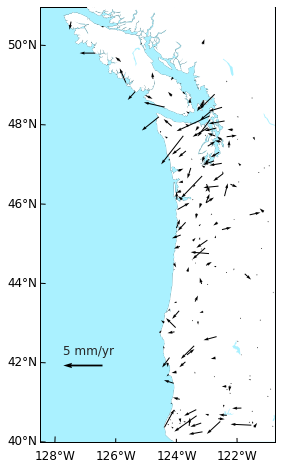

In [66]:
plt.figure(figsize=(5,8))
map = Basemap(llcrnrlon=-128.5,llcrnrlat=40,urcrnrlon=-120,urcrnrlat=51,
            resolution='i',projection='tmerc',lon_0=-124.25,lat_0=45.5)
map.drawmapboundary(fill_color=[0.6667, 0.9451, 1.000], zorder=0)
map.drawcoastlines(linewidth=0.2, zorder=1)
map.fillcontinents(color='white', zorder=2)
map.quiver(stalon, stalat, -ml_velo_e+rsi_velo_e, -ml_velo_n+rsi_velo_n, latlon=True, scale=30, zorder=3)
map.quiver(-126.5,42, -5, 0, latlon=True, scale=30, zorder=3)
plt.annotate('5 mm/yr', (0.1,0.2), xycoords='axes fraction')
map.drawparallels(lat_vec,labels=[1,0,0,0], linewidth=1, dashes=[6,900], color='k')
map.drawmeridians(lon_vec,labels=[0,0,0,1], linewidth=1, dashes=[6,900], color='k')
plt.savefig('velocities_diff.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

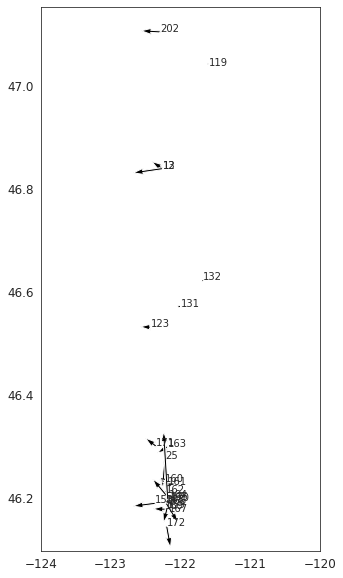

In [ ]:
aa = np.logical_and(stalat>46.13, stalat<47.35)
bb = np.logical_and(stalon>-122.5, stalon<-121.5)
index_vec = np.nonzero(np.logical_and(aa, bb))[0]
plt.figure(figsize=(5,10))
plt.quiver(stalon[index_vec], stalat[index_vec], -rsi_velo_e[index_vec], -rsi_velo_n[index_vec], linewidth=1)
for i in index_vec:
  plt.text(stalon[i], stalat[i], str(i), fontsize=10)
plt.xlim(-124,-120)
plt.show()